In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("car.xlsx")

In [3]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [4]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [5]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [6]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [7]:
Y = all_df['class'].values.astype('int64')

In [8]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [9]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1382

In [10]:
train_Features[:4]

array([[3., 2., 2., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1.],
       [0., 2., 3., 0., 0., 2.],
       [2., 2., 0., 0., 1., 2.]])

In [11]:
train_Label.shape

(1382,)

In [12]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [13]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [14]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model = Sequential()

In [17]:
model.add(Conv1D(filters=18,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(6,1), 
                 activation='relu'))

In [18]:
model.add(MaxPooling1D(pool_size=1))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(6, activation='tanh'))

In [21]:
model.add(Dense(4,activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 18)             36        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 18)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 108)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 654       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
Total params: 718
Trainable params: 718
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [24]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1)

Train on 1105 samples, validate on 277 samples
Epoch 1/30
1105/1105 [==============================] - 0s 411us/step - loss: 1.1057 - acc: 0.5792 - val_loss: 0.9393 - val_acc: 0.7112
Epoch 2/30
1105/1105 [==============================] - 0s 73us/step - loss: 0.9059 - acc: 0.6814 - val_loss: 0.8807 - val_acc: 0.7112
Epoch 3/30
1105/1105 [==============================] - 0s 71us/step - loss: 0.8550 - acc: 0.6814 - val_loss: 0.8380 - val_acc: 0.7004
Epoch 4/30
1105/1105 [==============================] - 0s 62us/step - loss: 0.8107 - acc: 0.6814 - val_loss: 0.7977 - val_acc: 0.6931
Epoch 5/30
1105/1105 [==============================] - 0s 64us/step - loss: 0.7774 - acc: 0.6787 - val_loss: 0.7641 - val_acc: 0.6931
Epoch 6/30
1105/1105 [==============================] - 0s 60us/step - loss: 0.7504 - acc: 0.6805 - val_loss: 0.7436 - val_acc: 0.7112
Epoch 7/30
1105/1105 [==============================] - 0s 65us/step - loss: 0.7329 - acc: 0.6887 - val_loss: 0.7346 - val_acc: 0.7329
Epoch 8

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

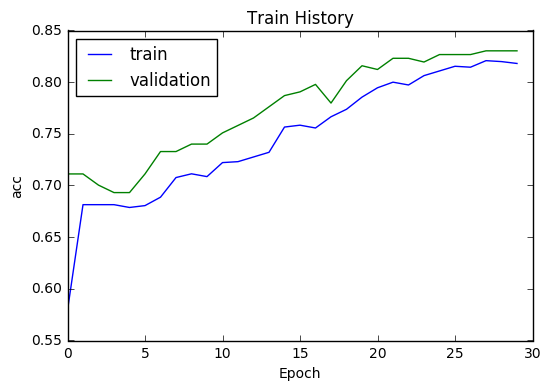

In [26]:
show_train_history(train_history,'acc','val_acc')

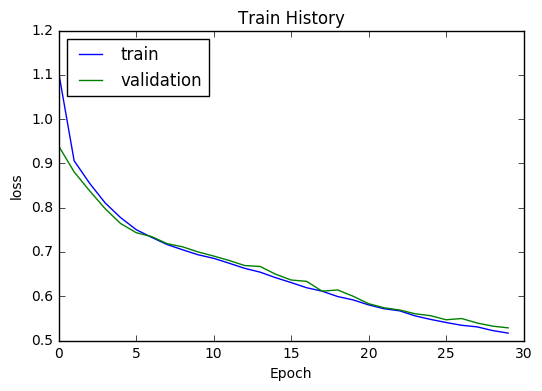

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

346/346 [==============================] - 0s 78us/step


In [29]:
scores[1]

0.8150289031122461